# PROJECT 1: IMPACTS OF COVID-19 VACCINATION STATUS

### Description of Project



### Order of Analysis

* COVID-19 Vaccination information for the Unitied States
* COVID-19 Vaccination for Age
* COVID-19 Vaccination for Sex
* COVID-19 Vaccination for Pregnancy
* COVID-19 Vaccination for Race/Ethnicity

## Importing dependencies

In [1]:
import pandas as pd
import seaborn as sns

#File Manipulation
import csv
import os

#Plots and Statistics
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
import numpy as np

#Matplotlib - convert HEX colors to RGB colors
import matplotlib.colors as mcolors


# Importing Plotly
import plotly.graph_objs as goNon-Hispanic Native Hawaiian or Other Pacific Islander
import plotly.io as pio
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
  
# Initializing Plotly
pio.renderers.default = 'colab'

## COVID-19 Vaccination - United States

### Retrieve the Data and store in DataFrame

In [2]:
#Import the vaccination data. Using dtype="object" to ensure all data is read in accurately.
vaccination_data = pd.read_csv("Resources/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status.csv", 
                               dtype="object", encoding="utf-8")

In [3]:
#Visualize
vaccination_data.head(2)

,outcome,month,MMWR week,Age group,Vaccine product,Vaccinated with outcome,Fully vaccinated population,Unvaccinated with outcome,Unvaccinated population,Crude vax IR,Crude unvax IR,Crude IRR,Age adjusted vax IR,Age adjusted unvax IR,Age adjusted IRR,Continuity correction
0,case,APR 2021,202114,12-17,all_types,7,"37,563","29,779","17,419,211",18.63535926,170.9549302,9.173685774,NaN,NaN,NaN,0
1,case,APR 2021,202114,18-29,all_types,605,"2,566,968","72,753","30,729,886",23.56866155,236.7499834,10.04511787,NaN,NaN,NaN,0


In [4]:
#Checking the dataframe to see if row counts are even
vaccination_data.count() 

#Since the data set has various row lengths, this needs to be cleaned up

outcome                        1283
month                          1283
MMWR week                      1283
Age group                      1283
Vaccine product                1283
Vaccinated with outcome        1283
Fully vaccinated population    1283
Unvaccinated with outcome      1283
Unvaccinated population        1283
Crude vax IR                   1283
Crude unvax IR                 1283
Crude IRR                      1190
Age adjusted vax IR             492
Age adjusted unvax IR           492
Age adjusted IRR                492
Continuity correction          1283
dtype: int64

### Clean COVID-19 Vaccination Data

In [5]:
#Removing unneccessary columns from our assessment:

del vaccination_data["Crude vax IR"]
del vaccination_data["Crude unvax IR"]
del vaccination_data["Crude IRR"]
del vaccination_data["Age adjusted vax IR"]
del vaccination_data["Age adjusted unvax IR"]
del vaccination_data["Age adjusted IRR"]
del vaccination_data["Continuity correction"]
del vaccination_data["Age group"]
del vaccination_data["Vaccine product"]

# Rechecking if total rows in each column is now even
vaccination_data.count()

outcome                        1283
month                          1283
MMWR week                      1283
Vaccinated with outcome        1283
Fully vaccinated population    1283
Unvaccinated with outcome      1283
Unvaccinated population        1283
dtype: int64

In [6]:
# Visualize
vaccination_data.tail(2)

,outcome,month,MMWR week,Vaccinated with outcome,Fully vaccinated population,Unvaccinated with outcome,Unvaccinated population
1281,death,MAY 2022,202221,224,"84,136,946",341,"53,672,511.95"
1282,death,MAY 2022,202221,425,"145,575,347.3",341,"53,672,511.95"


In [7]:
#Using Drop NA to clean up any other abnormalities within the data
vaccination_data= vaccination_data.dropna(how='any')

#Checking row count per column
vaccination_data.count()

outcome                        1283
month                          1283
MMWR week                      1283
Vaccinated with outcome        1283
Fully vaccinated population    1283
Unvaccinated with outcome      1283
Unvaccinated population        1283
dtype: int64

In [8]:
#Checking on the data type of all the columns in the DataFrame
vaccination_data.dtypes

outcome                        object
month                          object
MMWR week                      object
Vaccinated with outcome        object
Fully vaccinated population    object
Unvaccinated with outcome      object
Unvaccinated population        object
dtype: object

In [9]:
#Based on the tail view of the data there are commas in the field. Removing commas from numeric data

vaccination_data["Vaccinated with outcome"] =vaccination_data["Vaccinated with outcome"].str.replace(',','')
vaccination_data["Fully vaccinated population"] = vaccination_data["Fully vaccinated population"].str.replace(',','')
vaccination_data["Unvaccinated with outcome"] = vaccination_data["Unvaccinated with outcome"].str.replace(',','')
vaccination_data["Unvaccinated population"] = vaccination_data["Unvaccinated population"].str.replace(',','')

In [10]:
#Changing the datatype of the numeric data columns in the dataframe
vax_data = vaccination_data.astype({"Vaccinated with outcome":"float64",
                                    "Fully vaccinated population":"float64",
                                    "Unvaccinated with outcome":"float64",
                                    "Unvaccinated population":"float64"
                                   })
vax_data.dtypes

outcome                         object
month                           object
MMWR week                       object
Vaccinated with outcome        float64
Fully vaccinated population    float64
Unvaccinated with outcome      float64
Unvaccinated population        float64
dtype: object

In [11]:
#Updating DataFrame to only store data for TimeFrame: year 2021 as is available in the dataset
#MMWR week: MMWR epidemiological year and week [YYYYWW format; e.g. 202101]

vax_data = vax_data.loc[(vax_data["MMWR week"]<"202201"), :]

vax_data["month"].value_counts()

DEC 2021    108
JUN 2021    100
SEP 2021    100
APR 2021     80
MAY 2021     80
JUL 2021     80
AUG 2021     80
OCT 2021     80
NOV 2021     80
Name: month, dtype: int64

In [12]:
#Since there are multiple entries for each Month, renaming the entry names to allow for sorting later

vax_data['month'] = vax_data['month'].replace({'DEC 2021': 'Dec','JUN 2021': 'Jun',
                                               'SEP 2021': 'Sep', 'APR 2021': 'Apr',
                                               'MAY 2021': 'May','JUL 2021': 'Jul',
                                               'AUG 2021': 'Aug', 'OCT 2021': 'Oct',
                                               'NOV 2021': 'Nov', })

vax_data.tail()

,outcome,month,MMWR week,Vaccinated with outcome,Fully vaccinated population,Unvaccinated with outcome,Unvaccinated population
1047,death,Dec,202152,1491.0,7.044509e+06,1663.0,1173743.65
1048,death,Dec,202152,388.0,1.057349e+07,5538.0,61133825.15
1049,death,Dec,202152,1270.0,4.861592e+07,5538.0,61170540.15
1050,death,Dec,202152,1740.0,7.721120e+07,5538.0,61701273.15
1051,death,Dec,202152,3405.0,1.364774e+08,5538.0,61701273.15


In [13]:
#Month Dictionary to be used for sorting
month_dict = {'Jan':1,'Feb':2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 
              'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

vax_data = vax_data.sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))
vax_data.head()

,outcome,month,MMWR week,Vaccinated with outcome,Fully vaccinated population,Unvaccinated with outcome,Unvaccinated population
0,case,Apr,202114,7.0,37563.0,29779.0,17419211.0
679,death,Apr,202116,0.0,3954601.0,19.0,26171035.0
680,death,Apr,202116,3.0,10862486.0,178.0,33711074.0
681,death,Apr,202116,18.0,11777509.0,521.0,18340045.0
682,death,Apr,202116,57.0,17139013.0,723.0,6297215.0


### Graphicial Representation of the Data

Plotting chart showing the total vaccinated overall in the United States

In [14]:
#Using Matplotlib library to determine the colors with color blindness in mind
dodger_blue = mcolors.to_rgb("#1A85FF")
debian_red = mcolors.to_rgb("#D41159")

In [15]:
#Group by Month
vax_data_grouped = vax_data.groupby(["month"])

vax_data_grouped

### United States general population vaccination status (Apr - Dec 2021)

**Vaccinated status per month -  looking at the population number**

In [16]:
#Converted the Groupby to a Dataframe for Population
vax_pop_df = pd.DataFrame(vax_data_grouped[["Fully vaccinated population","Unvaccinated population"]].sum())
vax_pop_df = vax_pop_df.sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))
vax_pop_df

,Fully vaccinated population,Unvaccinated population
month,,
Apr,1.128323e+09,4.348547e+09
May,1.824950e+09,3.653288e+09
Jun,2.895301e+09,4.050733e+09
Jul,2.545812e+09,2.996654e+09
Aug,2.655148e+09,2.696658e+09
Sep,3.526211e+09,3.000549e+09
Oct,2.983695e+09,2.208187e+09
Nov,3.071785e+09,2.070365e+09
Dec,4.093613e+09,3.080941e+09


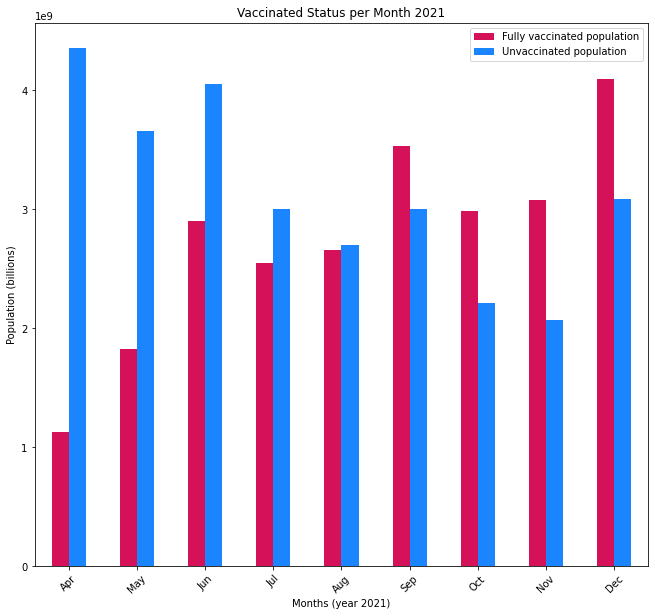

In [17]:
#Plotting the general populatin vaccination status
vax_pop_plot = vax_pop_df.plot.bar(rot=45, title="Vaccinated Status per Month 2021", figsize= (11,10),
                                  color={"Unvaccinated population": dodger_blue, "Fully vaccinated population":debian_red})   
vax_pop_plot.set_ylabel("Population (billions)")
vax_pop_plot.set_xlabel("Months (year 2021)")
vax_pop_plot.legend(loc="best")
plt.savefig("images/us_vax_status.png")

The bar chart above is shows an increase in the number of people getting vaccinated between April 2021 and Dec 2021. Subsequently, the unvaccinated population is decreasing for the same time period.

### COVID-19 Vaccination Status in the United States based on Outcome
*(where outcome is either positive COVID result or death resulting from contracting COVID)*

In [18]:
#Capturing the data for the COVID outcomes
vax_outcome_vax_df = vax_data[["month", "outcome", "Vaccinated with outcome","Unvaccinated with outcome"]]
vax_data_grouped_outcome = vax_outcome_vax_df.groupby(["month","outcome"],as_index=False)
outcome_df = vax_data_grouped_outcome.sum().sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))

outcome_df.head()


,month,outcome,Vaccinated with outcome,Unvaccinated with outcome
0,Apr,case,87079.0,4398055.0
1,Apr,death,1926.0,39710.0
11,May,death,1601.0,23035.0
10,May,case,74529.0,2041790.0
9,Jun,death,1841.0,17965.0


### COVID Cases by vaccination status (Apr - Dec 2021)

**Vaccinated status based on the COVID positive cases per month**

In [19]:
case_only= outcome_df[outcome_df["outcome"] =="case"]
case_only.head(2)

,month,outcome,Vaccinated with outcome,Unvaccinated with outcome
0,Apr,case,87079.0,4398055.0
10,May,case,74529.0,2041790.0


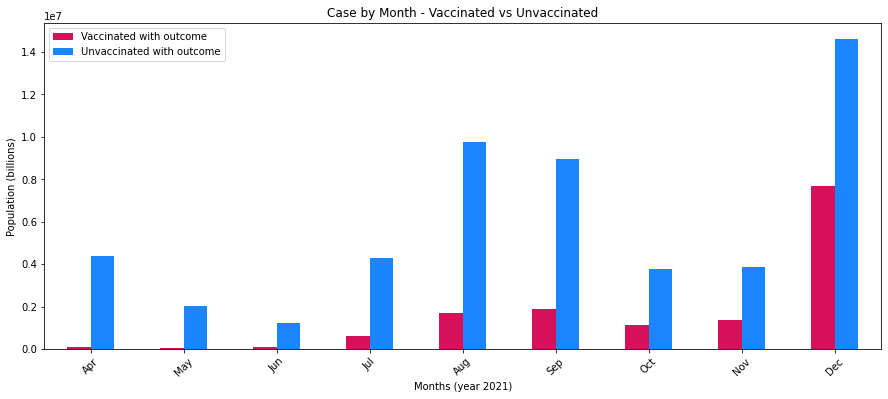

In [20]:
#Plotting Dataframe created from the GroupBy
vax_case_plot =case_only.plot.bar(x="month",rot=45,
                                    title="Case by Month - Vaccinated vs Unvaccinated", figsize=(15,6),
                                 color={"Unvaccinated with outcome": dodger_blue, "Vaccinated with outcome":debian_red}) 
vax_case_plot.set_ylabel("Population (billions)")
vax_case_plot.set_xlabel("Months (year 2021)")
vax_case_plot.legend(loc="best")
plt.savefig("images/us_cases_vax_status.png")


### COVID Deaths by vaccination status (Apr - Dec 2021)

**Vaccinated status based on the COVID positive death per month**

In [21]:
#Filtering out the Outcome for Deaths per Month for both vaccinated and unvaccinated population
death_only= outcome_df[outcome_df["outcome"] =="death"]
death_only.head(2)


,month,outcome,Vaccinated with outcome,Unvaccinated with outcome
1,Apr,death,1926.0,39710.0
11,May,death,1601.0,23035.0


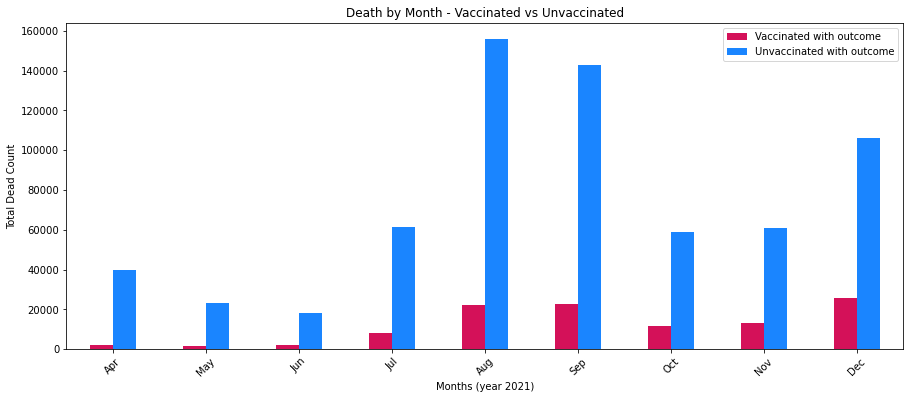

In [22]:
#Plotting Dataframe for Death of vaccinated vs unvaccinated
vax_death_plot =death_only.plot.bar(x="month",rot=45,
                                    title="Death by Month - Vaccinated vs Unvaccinated", figsize=(15,6),
                                   color={"Unvaccinated with outcome": dodger_blue, "Vaccinated with outcome":debian_red})
vax_death_plot.set_ylabel("Total Dead Count")
vax_death_plot.set_xlabel("Months (year 2021)")
vax_death_plot.legend(loc="best")
plt.savefig("images/us_death_vax_status.png")


### Summary Statistics

US vaccination trend:
Based on the line graph below, the fully vaccinated population is increasing. From the 2021 data, there is no evidence in a plateau of the vaccination rate.

<AxesSubplot:xlabel='month'>

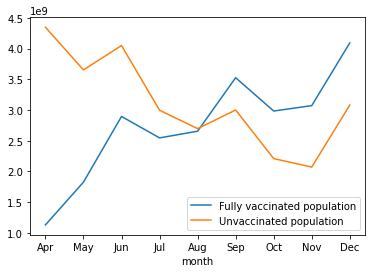

In [23]:
#Using the vaccination population figures, there was not a plateau in the number of people getting 
#vaccinated close to the end of the year. More people were choosing to be vaccinated.trends
vax_pop_df.plot.line()


In [24]:
# Calculate the correlation coefficient for fully vaccinated vs unvaccinated population

fully_vax = vax_pop_df.iloc[:,0]
unvax = vax_pop_df.iloc[:,1]
correlation = stats.pearsonr(fully_vax,unvax)
print(f"The correlation between the fully vaccinated and unvaccinated population is {round(correlation[0],2)}")


The correlation between the fully vaccinated and unvaccinated population is -0.55


In [25]:
# Calculate the correlation coefficient for fully vaccinated vs unvaccinated deaths

fully_vax_death = death_only.iloc[:,2]
unvax_death = death_only.iloc[:,3]
correlation = stats.pearsonr(fully_vax_death,unvax_death)
print(f"The correlation between the fully vaccinated and unvaccinated death is {round(correlation[0],2)}")

The correlation between the fully vaccinated and unvaccinated death is 0.91


### Summary Analysis

In [26]:
#Separating the death counts for both vaccinated and unvaccinated outcome resulting in death
#Per the Null Hypothesis: There is no difference in the death rate based on vaccination status.

death_numbers = death_only[["Vaccinated with outcome","Unvaccinated with outcome"]]

# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
stats.ttest_ind(death_numbers["Vaccinated with outcome"], death_numbers["Unvaccinated with outcome"], equal_var=False)

Ttest_indResult(statistic=-3.655805552976014, pvalue=0.00570508686987918)

## COVID-19 Vaccination - Age

### Clean COVID-19 Vaccination Data

In [27]:
#Vaccinations By Age

# Import our data into pandas from CSV
cleaned_age_1stdose_csv = 'Resources/COVID-19_Vaccination_Age_and_Sex_Trends_in_the_United_States__National_and_Jurisdictional.csv'
cleaned_age_1stdose = pd.read_csv(cleaned_age_1stdose_csv, low_memory=False)

del cleaned_age_1stdose['Date']
del cleaned_age_1stdose['Location']
del cleaned_age_1stdose['census']
del cleaned_age_1stdose['Series_Complete_Yes']
del cleaned_age_1stdose['Administered_Dose1_pct_agegroup']
del cleaned_age_1stdose['Series_Complete_Pop_pct_agegroup']
del cleaned_age_1stdose['Booster_Doses']
del cleaned_age_1stdose['Booster_Doses_Vax_pct_agegroup']


cleaned_age_1stdose


,Demographic_Category,Administered_Dose1
0,Female_Ages_<5yrs,17005.0
1,Female_Ages_<5yrs,NaN
2,Ages_12-17_yrs,570485.0
3,Ages_12-17_yrs,2519383.0
4,Ages_75+_yrs,2415141.0
...,...,...
1329775,Ages_75+_yrs,70.0
1329776,Female_Ages_65+_yrs,86.0
1329777,Female_Ages_65-74_yrs,14.0
1329778,Female_Ages_75+_yrs,8.0


In [28]:
sorted_df = cleaned_age_1stdose.sort_values(by='Demographic_Category')

#sorted_df

sorted_df = sorted_df.replace("Nan", np.nan)
new_sorted_df = sorted_df.groupby('Demographic_Category').first()
print(new_sorted_df)

                       Administered_Dose1
Demographic_Category                     
Age_Unknown                           2.0
Ages_12-17_yrs                   157485.0
Ages_18-24_yrs                    41018.0
Ages_25-39_yrs                 49479615.0
Ages_25-49_yrs                  1425229.0
Ages_40-49_yrs                   255636.0
Ages_5-11_yrs                       227.0
Ages_50-64_yrs                   192690.0
Ages_65+_yrs                    1121902.0
Ages_65-74_yrs                  2730723.0
Ages_75+_yrs                    1960419.0
Ages_<5yrs                        13294.0
Female_Ages_12-17_yrs            171302.0
Female_Ages_18-24_yrs             66807.0
Female_Ages_25-39_yrs            279288.0
Female_Ages_25-49_yrs            287980.0
Female_Ages_40-49_yrs             63278.0
Female_Ages_5-11_yrs               2650.0
Female_Ages_50-64_yrs             55614.0
Female_Ages_65+_yrs              342038.0
Female_Ages_65-74_yrs            930591.0
Female_Ages_75+_yrs              1

In [29]:
sorted_df[(sorted_df.Demographic_Category != "Age_Unknown") & (sorted_df.Demographic_Category != "Sex_Unknown") \
          & (sorted_df.Demographic_Category != "Ages_12-17_yrs") & (sorted_df.Demographic_Category != "Sex_Male") & (sorted_df.Demographic_Category != "Sex_Female") \
          & (sorted_df.Demographic_Category != "Male_Ages_<5yrs") & (sorted_df.Demographic_Category != "Male_Ages_75+_yrs")\
          & (sorted_df.Demographic_Category != "Male_Ages_65-74_yrs") & (sorted_df.Demographic_Category != "Male_Ages_65+_yrs")\
          & (sorted_df.Demographic_Category != "Male_Ages_50-64_yrs") & (sorted_df.Demographic_Category != "Male_Ages_5-11_yrs")\
          & (sorted_df.Demographic_Category != "Male_Ages_40-49_yrs") & (sorted_df.Demographic_Category != "Male_Ages_25-49_yrs")\
          & (sorted_df.Demographic_Category != "Male_Ages_25-39_yrs") & (sorted_df.Demographic_Category != "Male_Ages_18-24_yrs")\
          & (sorted_df.Demographic_Category != "Male_Ages_12-17_yrs") & (sorted_df.Demographic_Category != "Female_Ages_<5yrs")\
          & (sorted_df.Demographic_Category != "Female_Ages_75+_yrs") & (sorted_df.Demographic_Category != "Female_Ages_65-74_yrs")\
          & (sorted_df.Demographic_Category != "Female_Ages_65+_yrs") & (sorted_df.Demographic_Category != "Female_Ages_50-64_yrs")\
          & (sorted_df.Demographic_Category != "Female_Ages_5-11_yrs")& (sorted_df.Demographic_Category != "Female_Ages_40-49_yrs")\
          & (sorted_df.Demographic_Category != "Female_Ages_25-49_yrs")& (sorted_df.Demographic_Category != "Female_Ages_25-39_yrs")\
          & (sorted_df.Demographic_Category != "Female_Ages_18-24_yrs")& (sorted_df.Demographic_Category != "Female_Ages_12-17_yrs") & (sorted_df.Demographic_Category != "Ages_<5yrs")\
          & (sorted_df.Demographic_Category != "Ages_5-11_yrs") & (sorted_df.Demographic_Category != "Ages_65+_yrs") & (sorted_df.Demographic_Category != "Ages_25-49_yrs")]
         

,Demographic_Category,Administered_Dose1
1107916,Ages_18-24_yrs,41018.0
1107610,Ages_18-24_yrs,16156.0
307592,Ages_18-24_yrs,51335.0
826474,Ages_18-24_yrs,419235.0
1192137,Ages_18-24_yrs,68173.0
...,...,...
199898,Ages_75+_yrs,321359.0
983561,Ages_75+_yrs,96221.0
1137660,Ages_75+_yrs,59557.0
84690,Ages_75+_yrs,137401.0


In [76]:
type(sorted_df)

pandas.core.frame.DataFrame

### Graphicial Representation of the Data

In [ ]:
#sorted_df = pd.DataFrame(sorted_df)
  
X = list(sorted_df.iloc[:, 0])
Y = list(sorted_df.iloc[:, 1])
  
# Plot the data using bar() method
#plt.figure(figsize=(5,5))  #sizing chart. might be better way
plt.barh(X, Y, color='g')
plt.title("Covid Vaccinations by Age")
plt.xlabel("Number of Vaccinated (in MM)")
plt.ylabel("Age Groups")
plt.xticks(rotation=90)
plt.tight_layout()

In [78]:
# Import our data into pandas from CSV
age_vacc_csv = 'Resources/age_vacc_cleaned.csv'
age_vacc = pd.read_csv(age_vacc_csv, low_memory=False)

age_vacc = age_vacc.drop(age_vacc.index [ [ 0,1,2,3 ] ])

age_vacc

,Demographic_Category,Administered_Dose1
4,Ages_18-24_yrs,41018
5,Ages_25-39_yrs,1425229
6,Ages_40-49_yrs,255636
7,Ages_50-64_yrs,192690
8,Ages_65-74_yrs,2730723
9,Ages_75+yrs,1960419


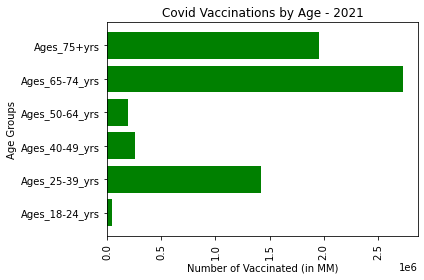

In [79]:
#age_vacc = pd.DataFrame(age_vacc)
  
X = list(age_vacc.iloc[:, 0])
Y = list(age_vacc.iloc[:, 1])
  
# Plot the data using bar() method
#plt.figure(figsize=(5,5))  #sizing chart. might be better way
plt.barh(X, Y, color='g')
plt.title("Covid Vaccinations by Age - 2021")
plt.xlabel("Number of Vaccinated (in MM)")
plt.ylabel("Age Groups")
plt.xticks(rotation=90)
plt.tight_layout()



# Show the plot
plt.show()

In [80]:
#Number of Deaths
# Import our data into pandas from CSV
cleaned_death_csv = 'Resources/deaths_by_age_group_cleaned.csv'
cleaned_death = pd.read_csv(cleaned_death_csv, low_memory=False)

#drop columns/rows not needed
cleaned_death = cleaned_death.drop(cleaned_death.index [ [ 0,1,2,3 ] ])
del cleaned_death['Percentage of deaths']
del cleaned_death['Percent of US population']

cleaned_death

,Age Group,Count of deaths
4,18-29 Years,6426
5,30-39 Years,15968
6,40-49 Years,36505
7,50-64 Years,159711
8,65-74 Years,199767
9,75+ Years,465290


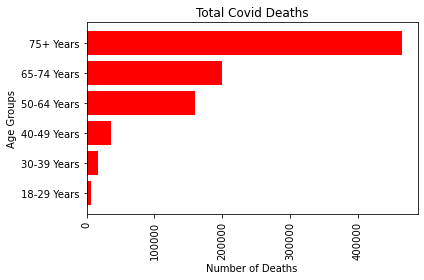

In [81]:
cleaned_death = pd.DataFrame(cleaned_death)
  
X = list(cleaned_death.iloc[:, 0])
Y = list(cleaned_death.iloc[:, 1])
  
# Plot the data using bar() method
#plt.figure(figsize=(5,5))  #sizing chart. might be better way
plt.barh(X, Y, color='r')
plt.title("Total Covid Deaths")
plt.xlabel("Number of Deaths")
plt.ylabel("Age Groups")
plt.xticks(rotation=90)
plt.tight_layout()



# Show the plot
plt.show()

## COVID-19 Vaccination - Sex

### Clean COVID-19 Vaccination Data

In [61]:
# Create a path to the csv and read it into a Pandas DataFrame
csv_path = "Resources/COVID-19_Vaccination_Age_and_Sex_Trends_in_the_United_States__National_and_Jurisdictional(2).csv"
df = pd.read_csv(csv_path)

df.head()

C:\bootcamp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,Location,Demographic_Category,census,Administered_Dose1,Series_Complete_Yes,Booster_Doses,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Booster_Doses_Vax_pct_agegroup
0,01/02/2021 12:00:00 AM,HI,Ages_25-39_yrs,"296,866","11,344",567,0.0,3.8,0.2,0.0
1,01/02/2021 12:00:00 AM,OR,Ages_25-39_yrs,"901,825","25,769",20,0.0,2.9,0.0,0.0
2,01/02/2021 12:00:00 AM,SD,Male_Ages_<5yrs,"31,383",NaN,NaN,NaN,NaN,NaN,NaN
3,01/02/2021 12:00:00 AM,CA,Male_Ages_<5yrs,"1,220,085",NaN,NaN,NaN,NaN,NaN,NaN
4,01/02/2021 12:00:00 AM,UT,Female_Ages_18-24_yrs,"177,306","4,448",26,0.0,2.5,0.0,0.0


In [62]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')
#01/02/2021 12:00:00 AM

In [63]:
#df["Demographic_Category"] = df["Demographic_Category"].replace(["Female_Ages_<5yrs","Female_Ages_5-11_yrs","Female_Ages_12-17_yrs","Female_Ages_18-24_yrs","Female_Ages_25-39_yrs","Female_Ages_25-49_yrs","Female_Ages_40-49_yrs","Female_Ages_50-64_yrs","Female_Ages_65-74_yrs","Female_Ages_75+_yrs","Female_Ages_65+_yrs"],["Female","Female","Female","Female","Female","Female","Female","Female","Female","Female","Female"])
#df["Demographic_Category"] = df["Demographic_Category"].replace(["Male_Ages_<5yrs","Male_Ages_5-11_yrs","Male_Ages_12-17_yrs","Male_Ages_18-24_yrs","Male_Ages_25-39_yrs","Male_Ages_25-49_yrs","Male_Ages_40-49_yrs","Male_Ages_50-64_yrs","Male_Ages_65-74_yrs","Male_Ages_75+_yrs","Male_Ages_65+_yrs"],["Male","Male","Male","Male","Male","Male","Male","Male","Male","Male","Male"])
#df["Demographic_Category"] = df["Demographic_Category"].replace(["Ages_25-39_yrs", "Ages_5-11_yrs", "Ages_18-24_yrs","Ages_40-49_yrs", "Ages_65-74_yrs", "Ages_65+_yrs", "Ages_12-17_yrs", "Ages_25-49_yrs", "Ages_50-64_yrs", "Ages_75+_yrs"],["Null","Null","Null","Null","Null","Null","Null","Null","Null","Null"])
df['Week_Number'] = df['Date'].dt.strftime('%U')

In [ ]:
#df = df[~df.isin(['Female']).any(axis=1)]
#df = df[~df.isin(['Male']).any(axis=1)]
#df = df[~df.isin(['Null']).any(axis=1)]

In [64]:
femalelocation_df = df.loc[df["Location"] == "US"]
malelocation_df = df.loc[df["Location"] == "US"]

In [65]:
malelocation_df.head()

,Date,Location,Demographic_Category,census,Administered_Dose1,Series_Complete_Yes,Booster_Doses,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Booster_Doses_Vax_pct_agegroup,Week_Number
153,2021-01-02,US,Ages_50-64_yrs,"63,659,835","1,727,481","17,300",0.0,2.7,0.0,0.0,00
189,2021-01-02,US,Male_Ages_18-24_yrs,"15,638,596","75,313",624,0.0,0.5,0.0,0.0,00
227,2021-01-02,US,Sex_Unknown,NaN,"207,917",433,0.0,NaN,NaN,0.0,00
254,2021-01-02,US,Sex_Female,"168,546,343","3,689,996","33,621",0.0,2.2,0.0,0.0,00
296,2021-01-02,US,Age_Unknown,NaN,638,0,0.0,NaN,NaN,0.0,00


In [66]:
female_df = femalelocation_df.loc[df["Demographic_Category"] == "Sex_Female"]
male_df = malelocation_df.loc[df["Demographic_Category"] == "Sex_Male"]

In [67]:
female_df['Administered_Dose1'] = female_df['Administered_Dose1'].str.replace(",","").astype(int)
male_df['Administered_Dose1'] = male_df['Administered_Dose1'].str.replace(",","").astype(int)

C:\Users\HOBBYD~1\AppData\Local\Temp/ipykernel_743988/2560509518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df['Administered_Dose1'] = female_df['Administered_Dose1'].str.replace(",","").astype(int)
C:\Users\HOBBYD~1\AppData\Local\Temp/ipykernel_743988/2560509518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_df['Administered_Dose1'] = male_df['Administered_Dose1'].str.replace(",","").astype(int)


In [68]:
last_row_female_df = female_df.iloc[-1]
last_row_female_df['Administered_Dose1']


126239799

In [69]:
last_row_male_df = male_df.iloc[-1]
last_row_male_df['Administered_Dose1']

115421583

### Graphicial Representation of the Data

<function matplotlib.pyplot.show(close=None, block=None)>

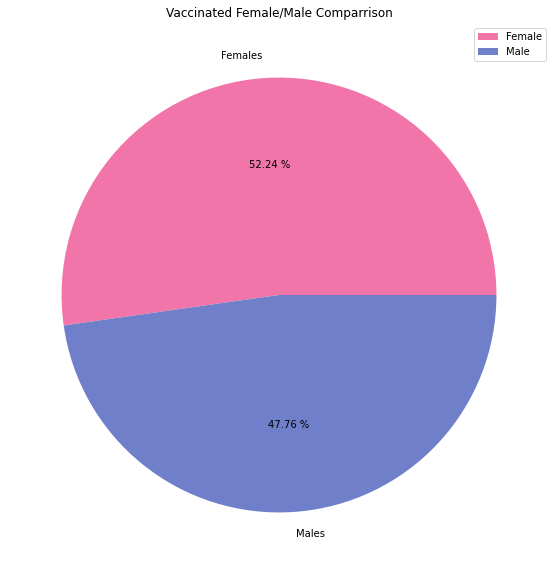

In [70]:
#set size of pie
plt.figure(figsize=(10,10))

#count the sum of rows in Administred_dose1 and have female 
female_pie = last_row_female_df['Administered_Dose1']
male_pie = last_row_male_df['Administered_Dose1']

#label female and malle and also set color 
labels = ['Females', 'Males']
colors = ['#F175A9', '#6F7FCA']

#pie chart comparrison from male to female, followed by labels, and color
plt.pie([female_pie, male_pie], labels=labels, colors=colors, autopct='%.2f %%')

#set title 
plt.title('Vaccinated Female/Male Comparrison')

#set Legend
plt.legend(["Female","Male"])

#save image 
plt.savefig('images/Pie_Graph.jpeg')

#show results 
plt.show

#labels=gender_type_count.index
#plt.pie([female_pie, male_pie], labels, colors=colors, autopct='%.2f %%')

In [71]:
male_df.set_index('Date', inplace=True)

male_df = male_df['Administered_Dose1'].resample('W').max()

In [72]:
female_df.set_index('Date', inplace=True)

female_df = female_df['Administered_Dose1'].resample('W').max()

In [74]:
female_df = pd.DataFrame(female_df)
male_df = pd.DataFrame(male_df)
female_df.reset_index()
male_df.reset_index().head()

,Date,Administered_Dose1
0,2021-01-03,2039093
1,2021-01-10,3629873
2,2021-01-17,5955534
3,2021-01-24,8695055
4,2021-01-31,11680040


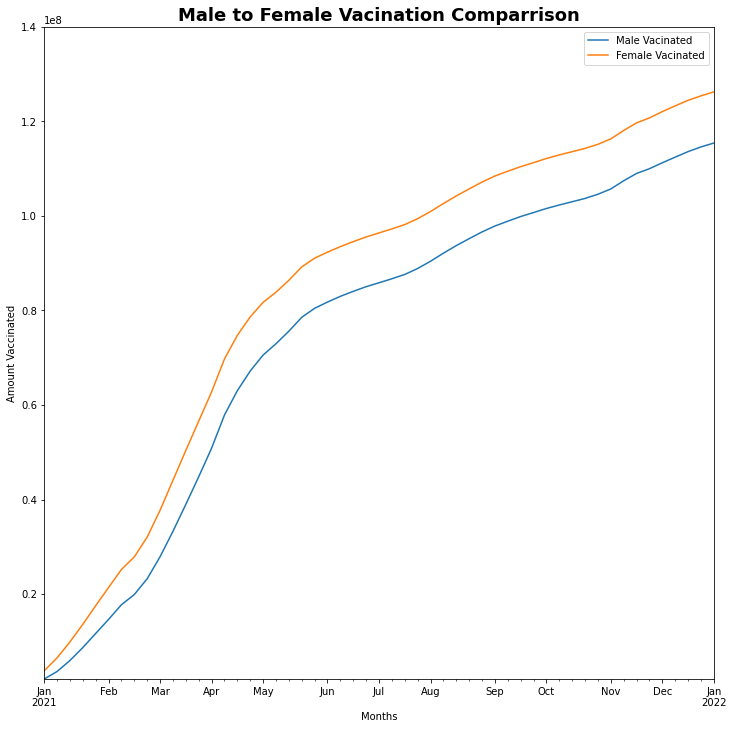

In [75]:
plt.figure(figsize=(12,12))
plt.title('Male to Female Vacination Comparrison', fontdict={'fontweight':'bold', 'fontsize': 18})
hi = male_df['Administered_Dose1'].plot(label='Male Vacinated')
bye = female_df['Administered_Dose1'].plot(label='Female Vacinated')

plt.xlabel('Months')
plt.ylabel('Amount Vaccinated')
plt.savefig('images/Male_AND_FEMALE.jpeg', dpi=300)
plt.ylim(2000000, 140000000)
plt.legend()

### COVID Deaths by Sex

In [39]:
# Create a path to the csv and read it into a Pandas DataFrame
csv_path = "Resources/deaths.csv"
df = pd.read_csv(csv_path)

df.head()

C:\bootcamp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,Footnote
0,11/24/2021,01-01-2020,11/20/2021,By Total,NaN,NaN,United States,All Sexes,All Ages,"7,73,812","62,94,875","6,95,560","3,99,005","9,451",NaN
1,11/24/2021,01-01-2020,11/20/2021,By Total,NaN,NaN,United States,All Sexes,Under 1 year,151,"35,550",391,19,23,NaN
2,11/24/2021,01-01-2020,11/20/2021,By Total,NaN,NaN,United States,All Sexes,0-17 years,621,"62,999","1,132",170,189,NaN
3,11/24/2021,01-01-2020,11/20/2021,By Total,NaN,NaN,United States,All Sexes,1-4 years,68,"6,606",224,19,65,NaN
4,11/24/2021,01-01-2020,11/20/2021,By Total,NaN,NaN,United States,All Sexes,5-14 years,199,"10,500",330,65,80,NaN


In [40]:
df['Start Date'] = pd.to_datetime(df['Start Date'])
#01/02/2021 12:00:00 AM

In [41]:
femalelocation_df = df.loc[df["Sex"] == "Male"]
malelocation_df = df.loc[df["Sex"] == "Female"]

In [42]:
female_df = femalelocation_df.loc[df["Age Group"] == "All Ages"]
male_df = malelocation_df.loc[df["Age Group"] == "All Ages"]

In [43]:
female_df1 = female_df.loc[df["State"] == "United States"]
male_df1 = male_df.loc[df["State"] == "United States"]

In [44]:
male_df1['COVID-19 Deaths'] = male_df1['COVID-19 Deaths'].str.replace(",","").astype(int)
female_df1['COVID-19 Deaths'] = female_df1['COVID-19 Deaths'].str.replace(",","").astype(int)

C:\Users\HOBBYD~1\AppData\Local\Temp/ipykernel_743988/65167082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_df1['COVID-19 Deaths'] = male_df1['COVID-19 Deaths'].str.replace(",","").astype(int)
C:\Users\HOBBYD~1\AppData\Local\Temp/ipykernel_743988/65167082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df1['COVID-19 Deaths'] = female_df1['COVID-19 Deaths'].str.replace(",","").astype(int)


In [45]:
#female_df1 = female_df1[['Month', 'COVID-19 Deaths']]
#male_df1 = female_df1[['Month', 'COVID-19 Deaths']]
female_df1 = female_df1[['Start Date', 'COVID-19 Deaths']]
male_df1 = male_df1[['Start Date', 'COVID-19 Deaths']]

In [46]:
male_df1.columns = male_df1.columns.str.replace('COVID-19 Deaths', 'COVID_Deaths')
female_df1.columns = female_df1.columns.str.replace('COVID-19 Deaths', 'COVID_Deaths')
male_df1.columns = male_df1.columns.str.replace('Start Date', 'Start_Date')
female_df1.columns = female_df1.columns.str.replace('Start Date', 'Start_Date')

In [47]:
male_df1 = male_df1[3:]
female_df1 = female_df1[3:]

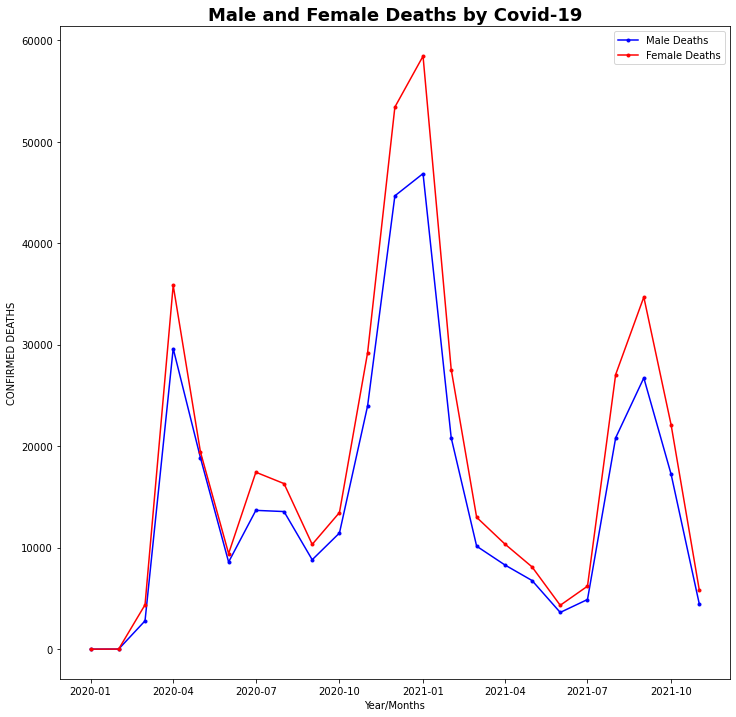

In [48]:
plt.figure(figsize=(12,12))
plt.title('Male and Female Deaths by Covid-19', fontdict={'fontweight':'bold', 'fontsize': 18})
plot1, = plt.plot(male_df1.Start_Date, male_df1.COVID_Deaths, 'b.-', label='Male Deaths')
plot2, = plt.plot(female_df1.Start_Date, female_df1.COVID_Deaths, 'r.-', label='Female Deaths')

plt.xlabel('Year/Months')

plt.ylabel('CONFIRMED DEATHS')

plt.savefig('images/Male_AND_FEMALE_Deaths.jpeg', dpi=300)
#plt.ylim(2000000, 140000000)
plt.legend()
plt.show()

## COVID-19 Vaccination - Pregnancy

### Clean COVID-19 Vaccination Data

In [31]:
#Create DF
preg_file = "Resources/pregnancy_data5.0.csv"
data_df = pd.read_csv(preg_file)


# Convert the date to datetime64
data_df["Week_Ending_Date"] = pd.to_datetime(data_df["Week_Ending_Date"], format='%Y-%m-%d')

#Filter Vaccinated - All Races
grouped_filter = data_df.groupby(["Week_Ending_Date"])["Vaccination Coverage Amount"].sum()
grouped_filter_df = pd.DataFrame(grouped_filter)
clean_df = grouped_filter_df.reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

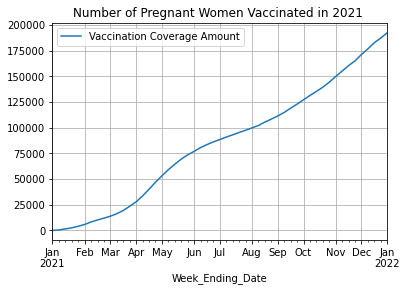

<Figure size 720x1440 with 0 Axes>

In [32]:
#Build Line Plot 
clean_df.plot.line(x="Week_Ending_Date", y="Vaccination Coverage Amount")
plt.title("Number of Pregnant Women Vaccinated in 2021 ")
plt.grid()
plt.figure(figsize=(10,20))
plt.show

In [33]:
#Percentage DF
filter_df = data_df.loc[(data_df["Vaccination Coverage Status"]=="Fully Vaccinated") & (data_df["Race and Ethnicity"]=="All Races/Ethnicity"),: ]
filter_df


amount_week= filter_df.groupby(["Week_Ending_Date"])["Vaccination Coverage Amount"].sum()
amount_by_week2 = pd.DataFrame(amount_week)
amount_by_week = amount_by_week2.reset_index()

denom_week = filter_df.groupby(["Week_Ending_Date"])["Denominator"].value_counts()
denom_by_week2 = pd.DataFrame(denom_week)
del denom_by_week2["Denominator"]
denom_by_week = denom_by_week2.reset_index()

merge = pd.merge(amount_by_week,denom_by_week, on="Week_Ending_Date")

merge['Denominator'] = merge['Denominator'].str.replace(',', '').astype(float)

merge["Vaccinated Coverage Percentage (%)"] = (merge["Vaccination Coverage Amount"] / merge["Denominator"]) *100
merge

,Week_Ending_Date,Vaccination Coverage Amount,Denominator,Vaccinated Coverage Percentage (%)
0,2021-01-02,0,103216.0,0.000000
1,2021-01-09,207,103668.0,0.199676
2,2021-01-16,728,103958.0,0.700283
3,2021-01-23,1249,104115.0,1.199635
4,2021-01-30,2087,104358.0,1.999847
5,2021-02-06,2931,104671.0,2.800203
6,2021-02-13,4187,104669.0,4.000229
7,2021-02-20,5131,104720.0,4.899733
8,2021-02-27,6089,104985.0,5.799876
9,2021-03-06,7045,105151.0,6.699889


<function matplotlib.pyplot.show(close=None, block=None)>

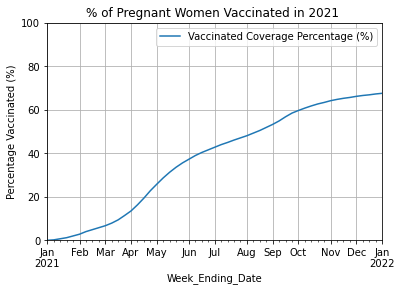

<Figure size 720x1440 with 0 Axes>

In [34]:
#Build Line Plot 
merge.plot.line(x="Week_Ending_Date", y="Vaccinated Coverage Percentage (%)")
plt.title("% of Pregnant Women Vaccinated in 2021 ")
plt.ylim(0,100)
plt.ylabel("Percentage Vaccinated (%)")
plt.grid()
plt.figure(figsize=(10,20))
plt.show

### Graphicial Representation of the Data

<function matplotlib.pyplot.show(close=None, block=None)>

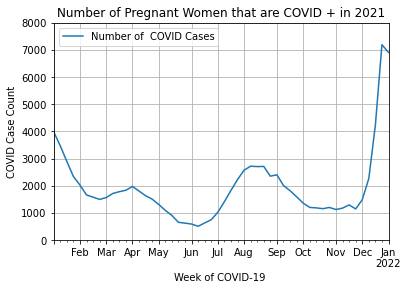

<Figure size 720x1440 with 0 Axes>

In [35]:
#Import COVID Cases Data 

cases_file = "Resources/pregnancy_covid_cases.csv"
cases_df = pd.read_csv(cases_file)

# Convert the date to datetime64
cases_df["Week of COVID-19 "] = pd.to_datetime(cases_df["Week of COVID-19 "], format='%Y-%m-%d')

#Build Line Plot 
cases_df.plot.line(x="Week of COVID-19 ", y='Number of  COVID Cases')
plt.title("Number of Pregnant Women that are COVID + in 2021")
plt.ylim(0,8000)
plt.ylabel("COVID Case Count")
plt.grid()
plt.figure(figsize=(10,20))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

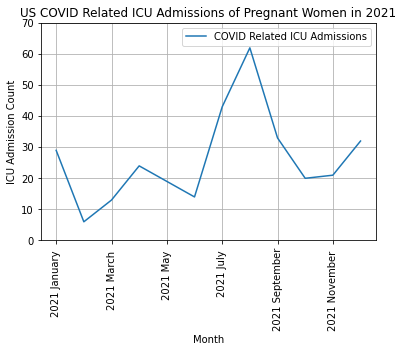

<Figure size 720x1440 with 0 Axes>

In [36]:
#Import COVID ICU/ Death Data 

ICU_file = "Resources/pregnancy_ICU_death.csv"
ICU_df = pd.read_csv(ICU_file)

#Build Line Plot 
ICU_df.plot.line(x="Month", y='COVID Related ICU Admissions')
plt.title("US COVID Related ICU Admissions of Pregnant Women in 2021")
plt.ylim(0,70)
plt.ylabel("ICU Admission Count")
plt.xticks(rotation =90)
plt.grid()
plt.figure(figsize=(10,20))
plt.show

### COVID Deaths by Pregnancy

<function matplotlib.pyplot.show(close=None, block=None)>

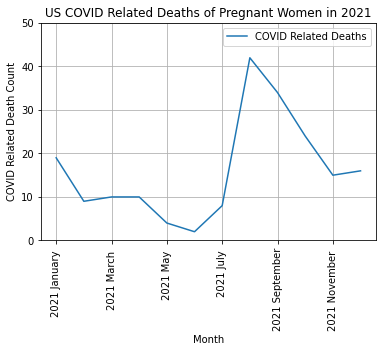

<Figure size 720x1440 with 0 Axes>

In [37]:
#Build Line Plot 
ICU_df.plot.line(x="Month", y='COVID Related Deaths')
plt.title("US COVID Related Deaths of Pregnant Women in 2021")
plt.ylim(0,50)
plt.ylabel("COVID Related Death Count")
plt.xticks(rotation =90)
plt.grid()
plt.figure(figsize=(10,20))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

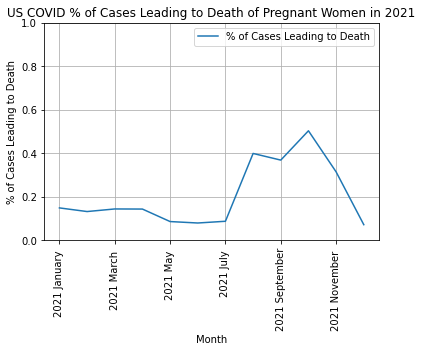

<Figure size 720x1440 with 0 Axes>

In [38]:
#Import COVID ICU/ Death Data 

total_file = "Resources/total_month.csv"
total_df = pd.read_csv(total_file)

total_df["% of Cases Leading to Death"]= (total_df["COVID Related Deaths"]/total_df["COVID Case Count"])*100
total_df

#Build Line Plot 
total_df.plot.line(x="Month", y="% of Cases Leading to Death")
plt.title("US COVID % of Cases Leading to Death of Pregnant Women in 2021")
plt.ylim(0,1)
plt.ylabel("% of Cases Leading to Death")
plt.xticks(rotation =90)
plt.grid()
plt.figure(figsize=(10,20))
plt.show

## COVID-19 Vaccination - Race/Ethnicity

### Clean COVID-19 Vaccination Data

In [49]:
# Importing Dataset1
dataset1 = pd.read_csv("Resources/Provisional_COVID-19_Deaths__Distribution_of_Deaths_by_Race_and_Hispanic_Origin.csv")
dataset1.head(5)

,Data as of,Start Date,End Date,Year,Month,Group,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Non Hispanic more than one race,Hispanic or Latino,Footnote
0,08/03/2022,01/01/2020,07/30/2022,2020-2022,NaN,By Total,United States,Count of COVID-19 deaths,664292.0,145361.0,11240.0,32105.0,2177.0,3921.0,162888.0,NaN
1,08/03/2022,01/01/2020,07/30/2022,2020-2022,NaN,By Total,United States,Distribution of COVID-19 deaths (%),64.8,14.2,1.1,3.1,0.2,0.4,15.9,NaN
2,08/03/2022,01/01/2020,07/30/2022,2020-2022,NaN,By Total,United States,Unweighted distribution of population (%),59.7,12.6,0.7,5.9,0.2,2.3,18.6,NaN
3,08/03/2022,01/01/2020,07/30/2022,2020-2022,NaN,By Total,United States,Weighted distribution of population (%),40.8,13.5,0.4,9.6,0.2,2.2,33.3,NaN
4,08/03/2022,01/01/2020,12/31/2020,2020,NaN,By Year,United States,Count of COVID-19 deaths,232935.0,61583.0,4618.0,13599.0,695.0,1147.0,69506.0,NaN


In [50]:
# Returns tuple of shape (Rows, columns)
print(dataset1.shape)
  
# Returns size of dataframe
print(dataset1.size)

(7420, 16)
118720


In [51]:
# Information about Dataset1
# return concise summary of dataframe
dataset1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7420 entries, 0 to 7419
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Data as of                                              7420 non-null   object 
 1   Start Date                                              7420 non-null   object 
 2   End Date                                                7420 non-null   object 
 3   Year                                                    7420 non-null   object 
 4   Month                                                   6572 non-null   float64
 5   Group                                                   7420 non-null   object 
 6   State                                                   7420 non-null   object 
 7   Indicator                                               7420 non-null   object 
 8   Non-Hispanic White                    

In [52]:
dataset1.describe()

,Month,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Non Hispanic more than one race,Hispanic or Latino
count,6572.000000,7230.000000,6650.000000,5888.000000,5890.000000,6408.000000,5860.000000,6404.000000
mean,5.935484,599.656252,141.098962,12.209579,36.029898,2.084488,5.356809,162.189834
std,3.350127,9471.584068,2183.343095,184.383979,540.094714,35.096594,63.567792,2632.356466
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,54.100000,3.900000,0.100000,1.500000,0.000000,0.000000,4.875000
50%,6.000000,71.100000,12.100000,0.300000,3.400000,0.000000,1.800000,11.000000
75%,9.000000,88.000000,25.900000,0.900000,7.200000,0.100000,2.400000,23.000000
max,12.000000,664292.000000,145361.000000,11240.000000,32105.000000,2177.000000,3921.000000,162888.000000


In [53]:
dataset1.isnull().sum()

Data as of                                                   0
Start Date                                                   0
End Date                                                     0
Year                                                         0
Month                                                      848
Group                                                        0
State                                                        0
Indicator                                                    0
Non-Hispanic White                                         190
Non-Hispanic Black or African American                     770
Non-Hispanic American Indian or Alaska Native             1532
Non-Hispanic Asian                                        1530
Non-Hispanic Native Hawaiian or Other Pacific Islander    1012
Non Hispanic more than one race                           1560
Hispanic or Latino                                        1016
Footnote                                               

In [54]:
dataset1.dropna(inplace = True)
dataset1.shape

(0, 16)

In [55]:
dataset1.isnull().sum()

Data as of                                                0.0
Start Date                                                0.0
End Date                                                  0.0
Year                                                      0.0
Month                                                     0.0
Group                                                     0.0
State                                                     0.0
Indicator                                                 0.0
Non-Hispanic White                                        0.0
Non-Hispanic Black or African American                    0.0
Non-Hispanic American Indian or Alaska Native             0.0
Non-Hispanic Asian                                        0.0
Non-Hispanic Native Hawaiian or Other Pacific Islander    0.0
Non Hispanic more than one race                           0.0
Hispanic or Latino                                        0.0
Footnote                                                  0.0
dtype: f

In [56]:
# Columns labels of a Dataset1
dataset1.columns

Index(['Data as of', 'Start Date', 'End Date', 'Year', 'Month', 'Group',
       'State', 'Indicator', 'Non-Hispanic White',
       'Non-Hispanic Black or African American',
       'Non-Hispanic American Indian or Alaska Native', 'Non-Hispanic Asian',
       'Non-Hispanic Native Hawaiian or Other Pacific Islander',
       'Non Hispanic more than one race', 'Hispanic or Latino', 'Footnote'],
      dtype='object')

In [ ]:
# Drop Month, Group, Indicator, and Footnote rows from dataset1
  
dataset1.drop(['Month', 'Group', 'Indicator','Footnote'], 
              axis=1, inplace=True)
  
# Select random set of values from dataset1
dataset1.sample(5)

In [58]:
df.describe()

,Year,Month
count,68850.000000,63342.000000
mean,2020.480000,6.260870
std,0.499603,3.326042
min,2020.000000,1.000000
25%,2020.000000,3.000000
50%,2020.000000,6.000000
75%,2021.000000,9.000000
max,2021.000000,12.000000


In [59]:
dataset1.dropna(inplace = True)
dataset1.shape

(0, 12)

### Graphicial Representation of the Data

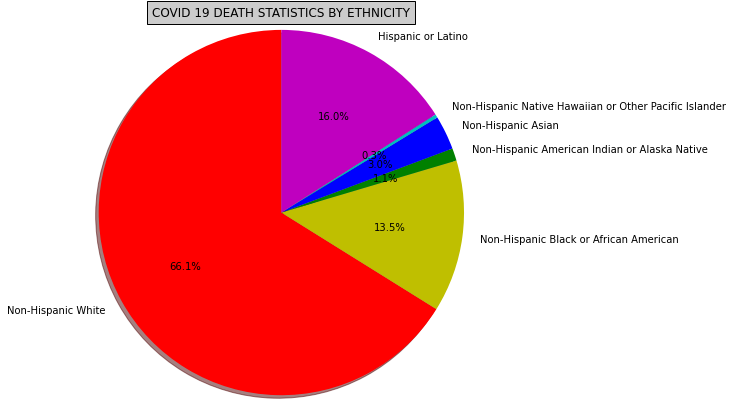

In [60]:
# defining labels
ethnicity = ['Non-Hispanic White', 'Non-Hispanic Black or African American','Non-Hispanic American Indian or Alaska Native', 'Non-Hispanic Asian','Non-Hispanic Native Hawaiian or Other Pacific Islander', 'Hispanic or Latino']
# portion covered by each label
deaths = [65.8, 13.4, 1.1, 3.0, 0.3, 15.9]
  
# color for each label
colors = ['r', 'y', 'g', 'b','c','m']
  
# plotting the pie chart
fig = plt.figure(figsize =(12, 7))
plt.pie(deaths, labels = ethnicity, colors=colors, 
        startangle=90, shadow = True, explode = (None),
        radius = 1.2, autopct = '%1.1f%%')
plt.title("COVID 19 DEATH STATISTICS BY ETHNICITY", bbox={'facecolor':'0.8', 'pad':5})  
# showing the plot
plt.show()

In [ ]:
# Importing Dataset2
dataset2 = pd.read_csv("Resources/race_ethnicity_of_people_fully_vaccinated.csv")
dataset2.head(5) 

In [ ]:
# Returns tuple of shape (Rows, columns)
print(dataset2.shape)
  
# Returns size of dataframe
print(dataset2.size)

In [ ]:
# Information about Dataset1
# return concise summary of dataframe
dataset2.info()

In [ ]:
dataset2.describe() 

In [ ]:
dataset2.isnull().sum()

In [ ]:
# Columns labels of a Dataset2
dataset2.columns

In [ ]:
# Drop % People completed vaccination in Last 14 Days and # People completed vaccination in Last 14 Days rows from dataset2
  
dataset2.drop(['% People completed vaccination in Last 14 Days', '# People completed vaccination in Last 14 Days'], 
              axis=1, inplace=True)
  
# Select random set of values from dataset1
dataset2.sample(5)

In [ ]:
# Columns labels of a Dataset2
dataset2.columns

In [ ]:
#importing Data
dataset2 = pd.read_csv("race_ethnicity_of_people_fully_vaccinated.csv")
df = pd.DataFrame(dataset2)

X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])

# Plot the data using bar() method
fig, ax = plt.subplots(figsize =(16, 12))
plt.barh(X, Y, color='g')
plt.title("VACCINATED PEOPLE BY ETHNICITY")
plt.xlabel("% People Fully Vaccinated")
plt.ylabel("Race_Ethnicity")

# Show the plot
plt.show()